In [47]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
dataset = pd.read_csv('./housing.csv')
print("First 5 rows of dataset:")
dataset.head()


First 5 rows of dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [49]:
dataset.dropna(inplace=True)
data = pd.get_dummies(dataset, columns=['ocean_proximity'], drop_first=True)

In [50]:
print("\nDataset Description:\n")
data.describe()



Dataset Description:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [51]:
print("\nChecking for missing values:\n")
data.isnull().sum()


Checking for missing values:



longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

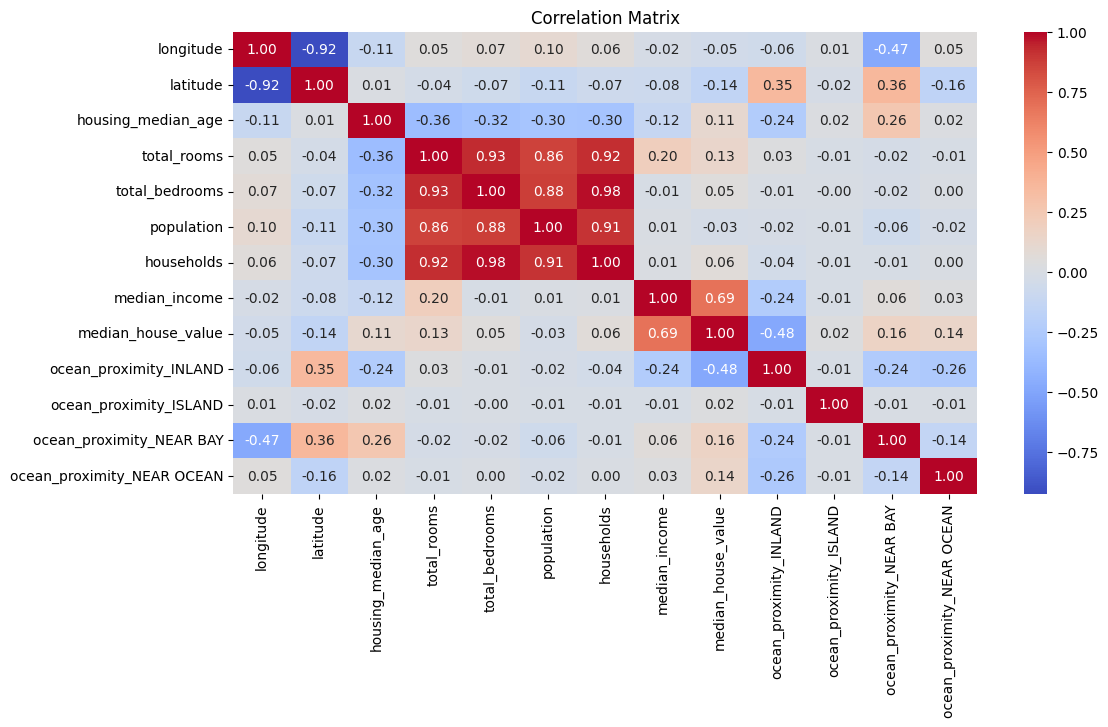

In [52]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

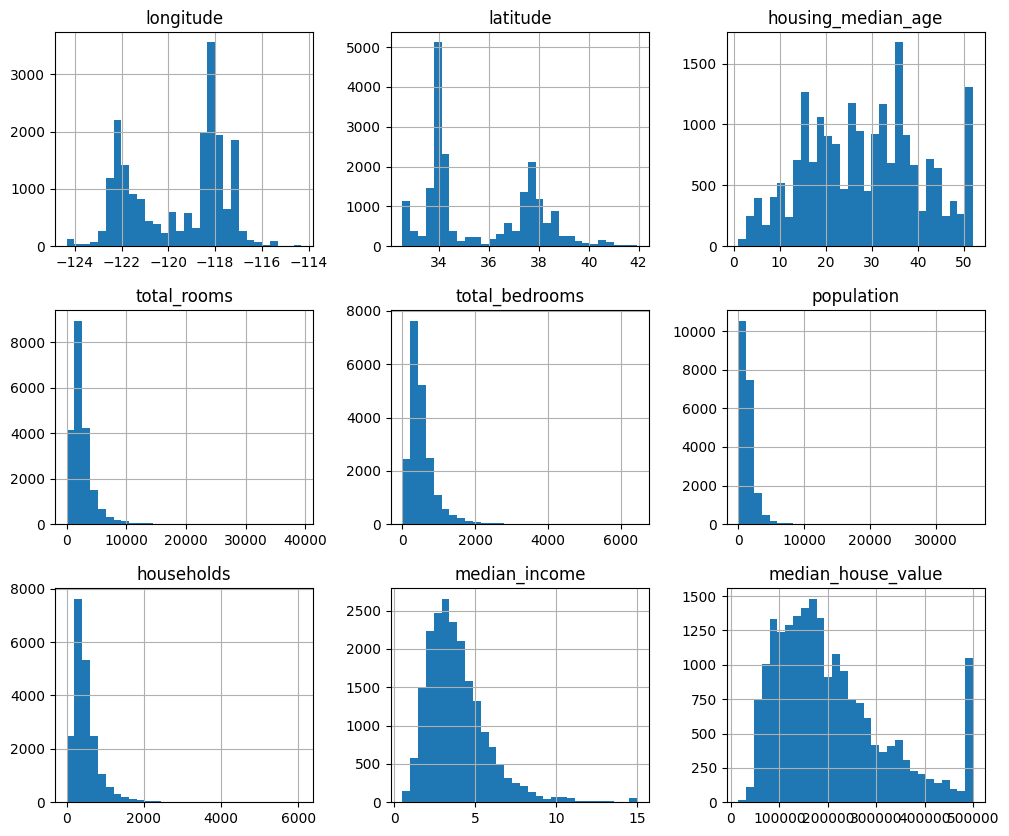

In [53]:
data.hist(figsize=(12, 10), bins=30)
plt.show()

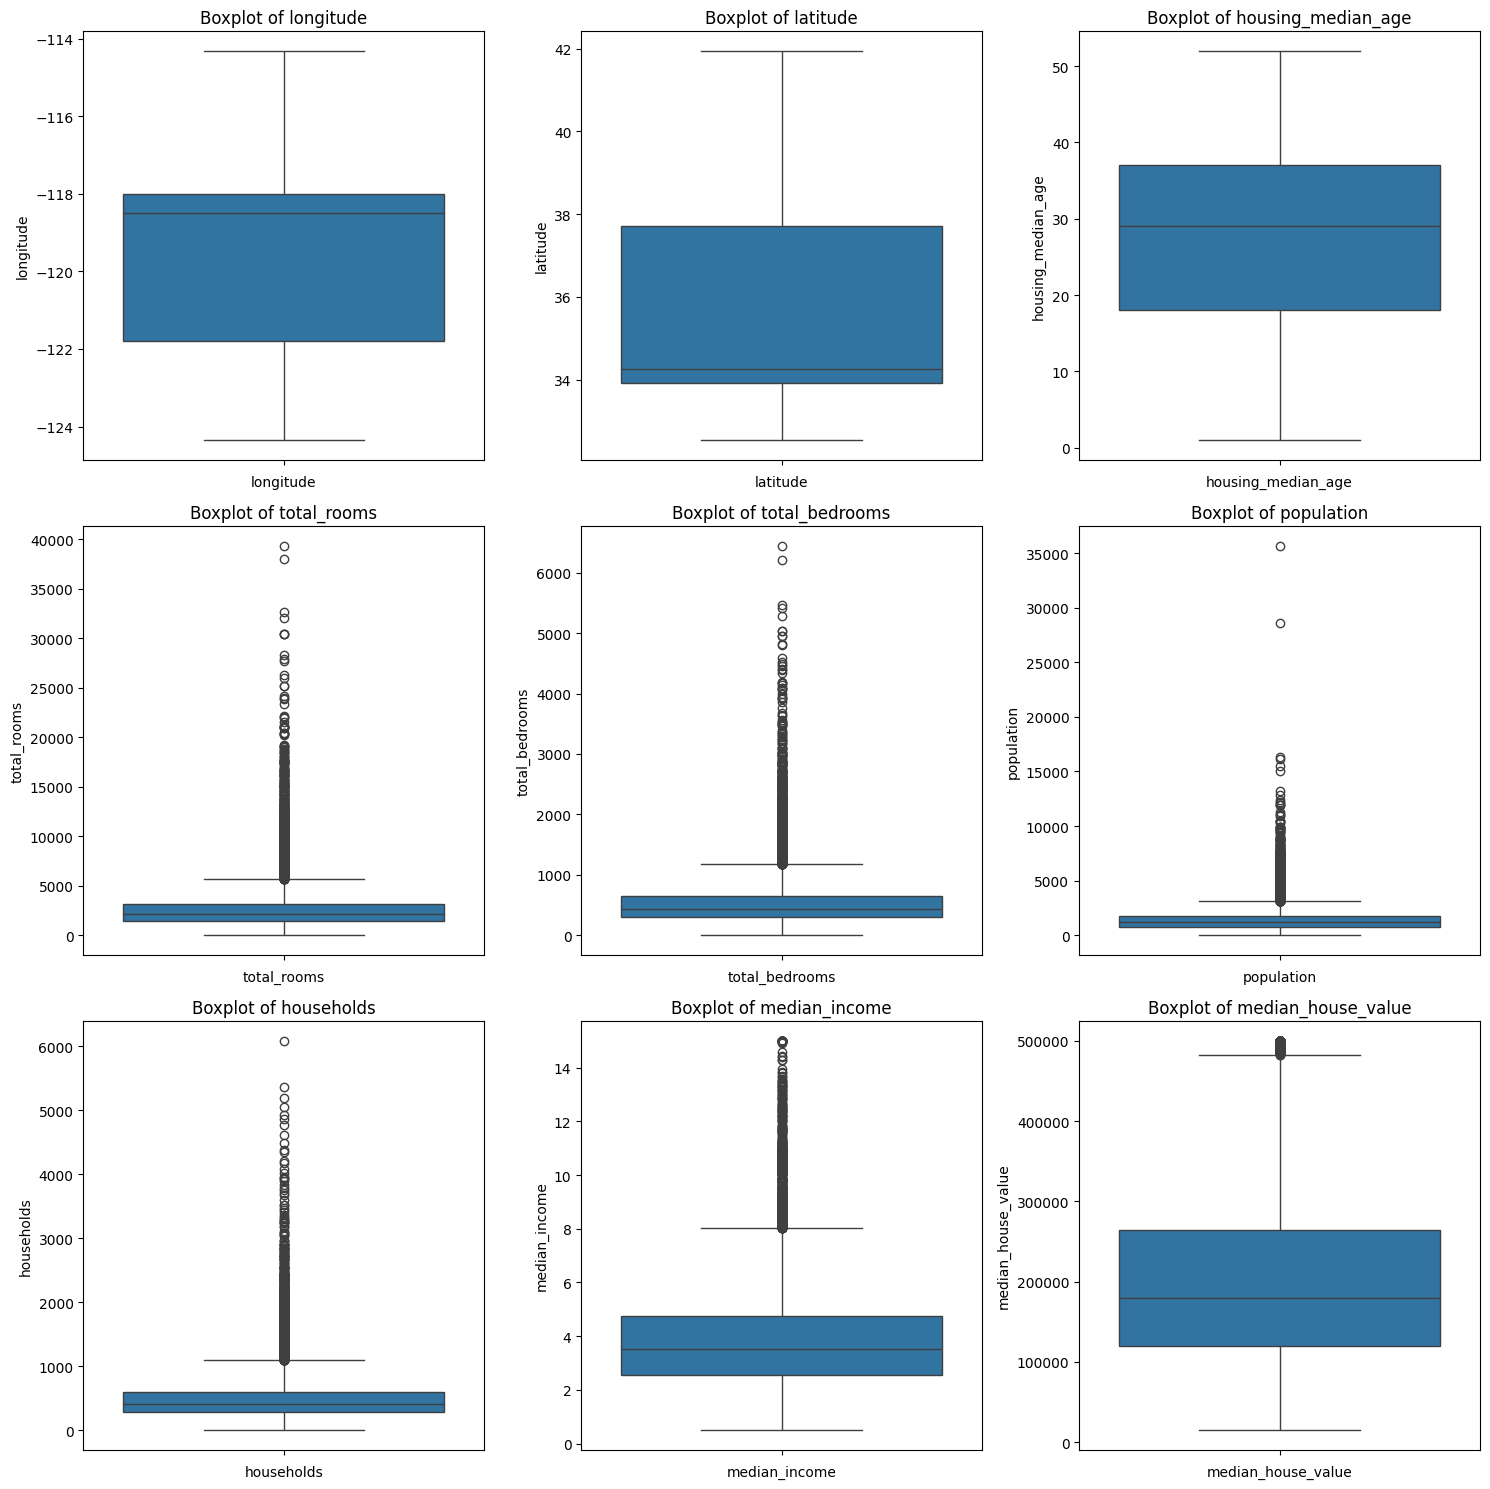

In [54]:
box_data = dataset.drop(columns=["ocean_proximity"])
num_features = len(box_data.columns)
rows = math.ceil(num_features / 3)  
cols = min(3, num_features)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten() if rows > 1 else [axes]

for i, col in enumerate(box_data.columns):
    sns.boxplot(box_data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()



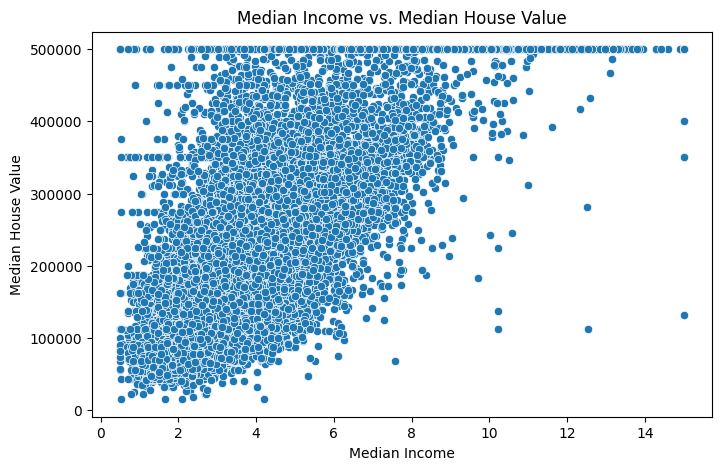

In [55]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['median_income'], y=data['median_house_value'])
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [56]:
X = data.drop(columns=['median_house_value']) 
y = data['median_house_value']  

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16346, 12), (4087, 12), (16346,), (4087,))

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nRegression Coefficients and Intercept:")
model.coef_, model.intercept_


Regression Coefficients and Intercept:


(array([-2.71087463e+04, -2.56578075e+04,  1.08136421e+03, -6.32214552e+00,
         1.03004042e+02, -3.64097514e+01,  4.31427249e+01,  3.92770830e+04,
        -3.92402178e+04,  2.13653374e+05, -6.23241688e+03,  3.16647713e+03]),
 -2299273.762102974)

In [59]:
y_pred = model.predict(X_test)

In [60]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score: {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 50413.4333081004
Mean Squared Error (MSE): 4802173538.604191
R-Squared Score: 0.648840215443197


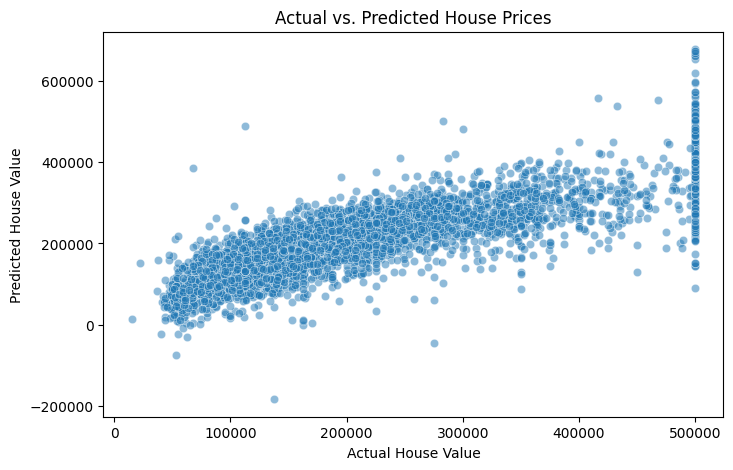

In [61]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs. Predicted House Prices')
plt.show()
